In [31]:
#importing all the requried Library
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [32]:
#reading the given data (news.csv)
news = pd.read_csv('news.csv')
news

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [33]:
news.shape

(6335, 4)

In [34]:
news.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [35]:
news.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [36]:
news.count()

Unnamed: 0    6335
title         6335
text          6335
label         6335
dtype: int64

In [37]:
news.dtypes

Unnamed: 0     int64
title         object
text          object
label         object
dtype: object

In [38]:
news[['Unnamed: 0', 'title', 'text', 'label']].head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [39]:
#Total count of REAL & FAKE news
news['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [40]:
news['title'].value_counts()

OnPolitics | 's politics blog                                                                         5
Hillary’s “Big Tent” is Obama’s “Grand Bargain” on Steroids                                           3
Michael Moore Owes Me $4.99                                                                           3
Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence    3
Clinton clearing primary field for potential 2016 run could leave her vulnerable                      2
                                                                                                     ..
Iran Nuclear Deal: Does Obama want Israel to commit suicide?                                          1
High-fat Ketogenic Diet for Weight Loss                                                               1
The next battle over same-sex marriage                                                                1
Los Angeles Times backs Clinton over Sanders                    

In [41]:
news['text'].value_counts()

Killing Obama administration rules, dismantling Obamacare and pushing through tax reform are on the early to-do list.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

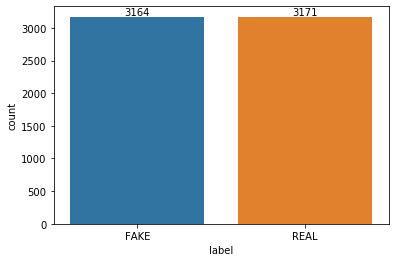

In [43]:
#Map & Visalize the data
Splot = sns.countplot(news['label'])
for p in Splot.patches:
    Splot.annotate(p.get_height(), (p.get_x() + p.get_width() / 2.,p.get_height()), ha = 'center', va = 'center',xytext = (0, 5), textcoords = 'offset points')

In [44]:
news[news['text'] == 'A verdict in 2017 could have sweeping consequences for tech startups.']

,Unnamed: 0,title,text,label
200,2076,'Historic' climate deal in sight as nations pa...,A verdict in 2017 could have sweeping conseque...,REAL
477,2057,Scott Walker's stealth 2016 strategy,A verdict in 2017 could have sweeping conseque...,REAL
805,1994,Inside Jeb's 'shock and awe' launch,A verdict in 2017 could have sweeping conseque...,REAL
819,2004,Cruz's immigration gambit,A verdict in 2017 could have sweeping conseque...,REAL
834,2036,Backers: Romney more open to 2016,A verdict in 2017 could have sweeping conseque...,REAL
2598,1927,Hillary's policies: Where's the beef?,A verdict in 2017 could have sweeping conseque...,REAL
2714,2000,President Paul? Wall Street on high alert,A verdict in 2017 could have sweeping conseque...,REAL
2819,1963,Foster Friess chides Rand Paul in not-so-priva...,A verdict in 2017 could have sweeping conseque...,REAL
2884,18,How Planned Parenthood could shut down the gov...,A verdict in 2017 could have sweeping conseque...,REAL
3038,1942,Hillary is new and improved! Take as directed.,A verdict in 2017 could have sweeping conseque...,REAL


# Preprocessing the data

In [45]:
# Adding a label as 0 for fake and 1 for real
news['label_num'] = news['label'].map({'FAKE':0, 'REAL':1})

#Another column with all texts including title and text
news['data'] = news['title']+' '+ news['text']
news.head()

,Unnamed: 0,title,text,label,label_num,data
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0,You Can Smell Hillary’s Fear Daniel Greenfield...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0,Watch The Exact Moment Paul Ryan Committed Pol...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1,Kerry to go to Paris in gesture of sympathy U....
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0,Bernie supporters on Twitter erupt in anger ag...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1,The Battle of New York: Why This Primary Matte...


In [46]:
news[['title','text','data']]

,title,text,data
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",You Can Smell Hillary’s Fear Daniel Greenfield...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,Watch The Exact Moment Paul Ryan Committed Pol...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,Kerry to go to Paris in gesture of sympathy U....
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",Bernie supporters on Twitter erupt in anger ag...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,The Battle of New York: Why This Primary Matte...
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,State Department says it can't find emails fro...
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,Anti-Trump Protesters Are Tools of the Oligarc...
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...","In Ethiopia, Obama seeks progress on peace, se..."


In [47]:
# Splitting of the Dataset into X_DATA & Y_DATA
from sklearn.model_selection import train_test_split

X_data=news['data']
Y_data=news['label']
x_train,x_test,y_train,y_test=train_test_split(X_data,Y_data, test_size=0.3, random_state=1705)

In [48]:
X_data[3],Y_data[3]

("Bernie supporters on Twitter erupt in anger against the DNC: 'We tried to warn you!' — Kaydee King (@KaydeeKing) November 9, 2016 The lesson from tonight's Dem losses: Time for Democrats to start listening to the voters. Stop running the same establishment candidates. \n— People For Bernie (@People4Bernie) November 9, 2016 If Dems didn't want a tight race they shouldn't have worked against Bernie. \n— Walker Bragman (@WalkerBragman) November 9, 2016 \nNew York Times columnist Paul Krugman, who was one of Hillary Clinton’s most outspoken surrogates during the contentious Democratic primary, blamed Clinton’s poor performance on Green Party candidate Jill Stein, who has so far received a negligible number of votes nationally, saying Stein was the Ralph Nader of 2016 in preventing a Clinton victory. The account @BerniesTeachers threw Krugman’s analysis back in his face. Your candidate was the issue. Take responsibility. https://t.co/KHyOuUSrFS \n— Teachers for Bernie (@BerniesTeachers) N

## Defining TfidfVectorizer

In [49]:
tfidf_vectorizer = TfidfVectorizer(analyzer='word', stop_words = "english")
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)
#store the data into tfidf.pkl fill in current directory
pickle.dump(tfidf_vectorizer, open("tfidf.pkl", "wb"))
tf1 = pickle.load(open("tfidf.pkl", 'rb'))

# Create a new tfidfVectorizer
tf1_new = TfidfVectorizer(analyzer='word', stop_words = "english", vocabulary = tf1.vocabulary_)

In [50]:
tfidf_vectorizer.vocabulary_

{'revealing': 43716,
 'interview': 27116,
 'trump': 52911,
 'predicts': 40088,
 'massive': 32256,
 'recession': 42313,
 'intends': 26920,
 'eliminate': 17370,
 'national': 34979,
 'debt': 13860,
 'years': 57242,
 'donald': 16147,
 'said': 44899,
 'economic': 17010,
 'conditions': 11614,
 'perilous': 38483,
 'country': 12596,
 'headed': 23946,
 'terrible': 51311,
 'time': 51885,
 'right': 43966,
 'invest': 27249,
 'stock': 49302,
 'market': 32072,
 'embracing': 17507,
 'distinctly': 15825,
 'gloomy': 22245,
 'view': 55163,
 'economy': 17018,
 'counters': 12581,
 'mainstream': 31615,
 'forecasts': 20645,
 'new': 35369,
 'york': 57346,
 'billionaire': 6766,
 'dismissed': 15623,
 'concern': 11546,
 'comments': 11270,
 'exceedingly': 18665,
 'unusual': 54325,
 'unprecedented': 54125,
 'major': 31641,
 'party': 37971,
 'runner': 44664,
 'potentially': 39869,
 'affect': 2647,
 'financial': 20008,
 'markets': 32083,
 'know': 29223,
 'wall': 55681,
 'street': 49499,
 'people': 38404,
 'probably

In [51]:
tfidf_train.shape

(4434, 58136)

In [52]:
tfidf_test.shape

(1901, 58136)

# Passive Aggressive Classifier

In [53]:
pac=PassiveAggressiveClassifier(max_iter=100)
pac.fit(tfidf_train,y_train)

y_pred=pac.predict(tfidf_test)

In [54]:
type(pac)

sklearn.linear_model._passive_aggressive.PassiveAggressiveClassifier

In [55]:
# print message for Fake News
x_test[y_test < y_pred]

3442    Here’s How Goldman Sachs Lays People Off | Fin...
5522    Texas Cop Fired For Feeding ‘Feces’ Sandwich T...
848     California & Oregon Want To Secede From The U....
478     Gauis Publius: TPP Has Picked Up a Powerful En...
1967    How To Repair Strained Or Broken Relationships...
5653    Reflections on US Political Tragedies Reflecti...
2329    ATTENTION WESTERN WORLD: If You Care About You...
315     Trump Family Say Trump Brand Has NOT Been Dama...
3910    YIKES! Megyn Kelly Receives RUDE AWAKENING- Re...
3882    Libertarian Party VP insults Trump, practicall...
5615    Liberty or State Control? You Decide Op-Ed by ...
151     Classless Obama Refuses Photo-Op of White Hous...
5123    What Does It Take to Survive Where You Live? L...
2521    All we need to know about Trump’s demise we le...
5674    FOX: Latinos Are Already CRUSHING Trump At The...
1254    Pentagon Seeks Another $6 Billion for Overseas...
3217    Gay man finds it in himself to tolerate religi...
4834    Donald

In [56]:
# print message for Real News
x_test[y_test > y_pred]

5609    If you really want to save energy at home, for...
1557    For the Record's week in review: Trump's list ...
3614    Extreme weather to cause extreme food shortage...
5556    Sources: US officials warned DNC of hack month...
2652    Mali: At least 20 dead after gunmen storm luxu...
2938    Trump’s Hitlerian disregard for the truth The ...
2277    Hot dogs, bacon and other processed meats caus...
4122    Families To Roof: 'I Forgive You, And Have Mer...
3897    Clinton Camp Tries to Deflect Suspicion as FBI...
1327    Conservatives in a meltdown: National Review’s...
1134    Adelson's Review-Journal Gives Trump First Maj...
799     Kentucky governor: Electing Hillary Clinton ma...
3021    NATO and Putin: Downed Russian bomber is big t...
4138    Trump’s misleading claim that 58 percent of bl...
741     Debating the Future of American Power Abroad T...
3522    Listen to the Donald Trump voters: It has take...
1784    As His Campaign Crumbles, Trump Is Spending Hi...
5039    Trump 

In [57]:
#checking Accuracy
News_Score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(News_Score*100,5)}%')

Accuracy: 94.10836%


In [58]:
#constructing confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])

In [59]:
print(confusion_matrix)

[[888  53]
 [ 59 901]]


In [60]:
print("True Positives News : " + str(confusion_matrix[0][0]) + "\nTrue Negatives News : " + str(confusion_matrix[1][1]))
print("False Positives News : " + str(confusion_matrix[1][0]) + "\nFalse Negatives News : " + str(confusion_matrix[0][1]))

True Positives News : 888
True Negatives News : 901
False Positives News : 59
False Negatives News : 53


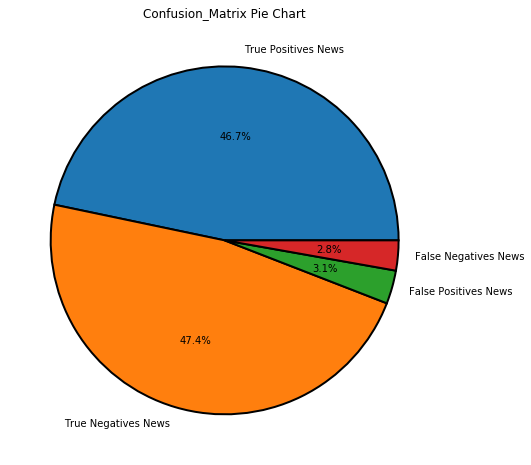

In [61]:
labels = 'True Positives News', 'True Negatives News', 'False Positives News', 'False Negatives News'
size = [confusion_matrix[0][0], confusion_matrix[1][1], confusion_matrix[1][0], confusion_matrix[0][1]]
plt.figure(figsize=(8,8))
plt.title('Confusion_Matrix Pie Chart')
plt.pie(size,labels=labels,autopct='%1.1f%%',wedgeprops={"edgecolor":"k",'linewidth': 2,'antialiased': True});

##### Save the file as testmodel in your active folder  

In [62]:
import pickle
pkl_filename = "testmodel.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(pac, file)
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
score = pickle_model.score(tfidf_test, y_test)
print("The Test-Score is: {0:.5f} %".format(100 * score))
Ypredict = pickle_model.predict(tfidf_test)

The Test-Score is: 94.10836 %


###### Check weather the news is fack or real

In [63]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
text = input("Write  news to check is it False or True: ")
print("The News is:",text)
pkl_filename = "testmodel.pkl"
try:
    with open(pkl_filename, 'rb') as file:
        model = pickle.load(file)
        tf1 = pickle.load(open("tfidf.pkl", 'rb'))
    print("Model Runned Successfully.")
except:
    print("Model not found")
    

tf1_new = TfidfVectorizer(analyzer='word', stop_words = "english", vocabulary = tf1.vocabulary_)

X_temp = tf1_new.fit_transform([text])
X_temp.toarray()
predict = model.predict(X_temp)
print(predict)

Write  news to check is it False or True: Clinton Camp Tries to Deflect Suspicion
The News is: Clinton Camp Tries to Deflect Suspicion
Model Runned Successfully.
['FAKE']


In [64]:
n=1210
X_data[n],Y_data[n]

('There’s a good reason protesters at the University of Missouri didn’t want the media around Video of a confrontation between a news photographer and protesters at the University of Missouri on Monday led to a dispute between journalists and the activists’ sympathizers beyond the campus walls. In response to a series of racial issues at the university, a circle of arm-linked students sought to designate a “safe space” around an encampment on the campus quad. When they blocked journalist Tim Tai from photographing the encampment, reporters complained that media were denied access to a public space.\n\nCertainly, Tai – like any journalist – had a legal right to enter the space, given that it was in a public area. But that shouldn’t be the end of this story. We in the media have something important to learn from this unfortunate exchange. The protesters had a legitimate gripe: The black community distrusts the news media because it has failed to cover black pain fairly.\n\nAs a journalis

In [65]:
#Predicting the News
X_temp = tf1_new.fit_transform([X_data[n]])
X_temp.toarray()
predict = model.predict(X_temp)
print(predict)

['REAL']
